In [393]:
# NumPy für numerische Berechnungen
import numpy as np

# pandas für Datenmanipulation und -analyse
import pandas as pd

# Funktion zum Aufteilen von Daten in Trainings- und Testsets
from sklearn.model_selection import train_test_split

# SMOTE für das Balancieren von Datensätzen
from imblearn.over_sampling import SMOTE

# StandardScaler zur Standardisierung der Merkmale
from sklearn.preprocessing import StandardScaler

# PCA zur Reduktion der Dimensionalität
from sklearn.decomposition import PCA

# matplotlib für die Erstellung von Grafiken
import matplotlib.pyplot as plt

# Seaborn für statistische Datenvisualisierungen
import seaborn as sns

# Modul zum Steuern von Warnmeldungen
import warnings

# Deaktiviert Warnmeldungen
warnings.filterwarnings('ignore')


In [395]:
#Dataset importieren 
data = pd.read_csv("/Users/dankobi/Coding/Data_Science/train_u6lujuX_CVtuZ9i (1).csv")


In [397]:
#erster überblick über das Dataset
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [399]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [401]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [403]:
#Rohdatenanalyse 

#überprüfen auf fehlende werte
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

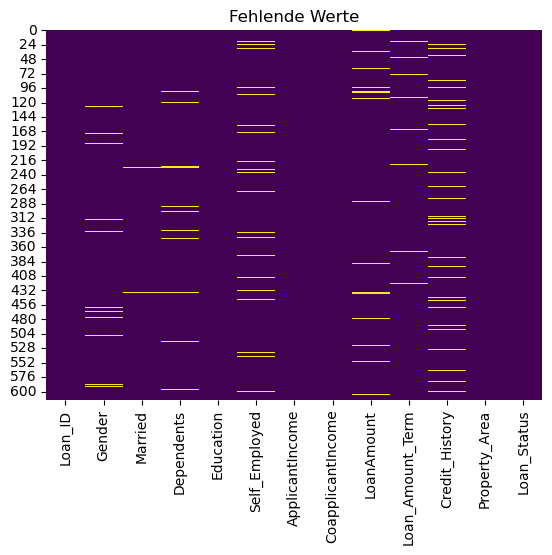

In [405]:
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Fehlende Werte")
plt.show()

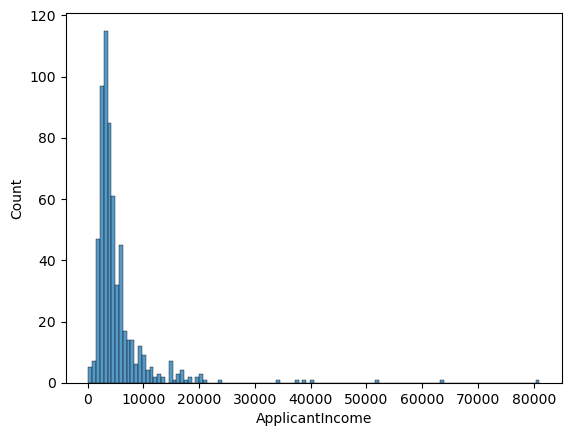

In [406]:
# Visualisierung der numerischen Daten 

sns.histplot(data['ApplicantIncome'])
plt.show()

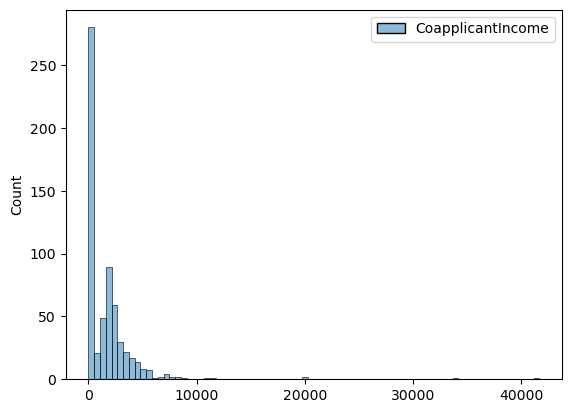

In [407]:
sns.histplot(data[['CoapplicantIncome']])
plt.show()

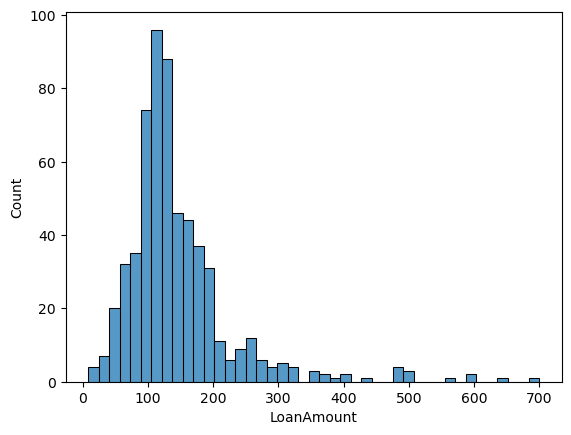

In [411]:
sns.histplot(data['LoanAmount'])
plt.show()

In [413]:
#löschen der spalte ID weil irrelevant
data = data.drop('Loan_ID', axis=1)

# Kategorische Spalten mit dem Modus auffüllen
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['Married'].fillna(data['Married'].mode()[0], inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True)

In [415]:
# Numerische Spalten mit dem Median auffüllen
data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median(), inplace=True)
data['Credit_History'].fillna(0.0, inplace=True)

data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [417]:
# Definiere den StandardScaler
scaler = StandardScaler()

# Liste der numerischen Spalten, die standardisiert werden sollen
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

# Anwenden des StandardScalers auf die numerischen Spalten
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Überprüfen der Standardisierung (der Mittelwert sollte 0 und die Standardabweichung 1 sein)
print(data[numerical_cols].mean())
print(data[numerical_cols].std())

ApplicantIncome     -4.339634e-18
CoapplicantIncome    4.050325e-17
LoanAmount          -2.603780e-17
Loan_Amount_Term     5.930833e-17
Credit_History      -2.893089e-17
dtype: float64
ApplicantIncome      1.000815
CoapplicantIncome    1.000815
LoanAmount           1.000815
Loan_Amount_Term     1.000815
Credit_History       1.000815
dtype: float64


In [419]:
data.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,0.072991,-0.554487,-0.211241,0.273231,0.540954,Urban,Y
1,Male,Yes,1,Graduate,No,-0.134412,-0.038732,-0.211241,0.273231,0.540954,Rural,N


In [421]:
#Umgang mit kategorischen Daten - One Hote Encoding 

data = pd.get_dummies(data, columns=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area'], drop_first=True)

data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0.072991,-0.554487,-0.211241,0.273231,0.540954,Y,True,False,False,False,False,False,False,False,True
1,-0.134412,-0.038732,-0.211241,0.273231,0.540954,N,True,True,True,False,False,False,False,False,False
2,-0.393747,-0.554487,-0.948996,0.273231,0.540954,Y,True,True,False,False,False,False,True,False,True
3,-0.462062,0.251980,-0.306435,0.273231,0.540954,Y,True,True,False,False,False,True,False,False,True
4,0.097728,-0.554487,-0.056551,0.273231,0.540954,Y,True,False,False,False,False,False,False,False,True


In [423]:
#Aufteilung Dataset
# Definiere die Features (X) und Zielvariable (y)
X = data.drop('Loan_Status', axis=1)  # Beispiel: 'survived' ist die Zielvariable
y = data['Loan_Status']

# Aufteilen der Daten in Training (80%) und Test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Überblick der Aufteilung
print(f"Trainingsset: {X_train.shape}")
print(f"Testset: {X_test.shape}")

Trainingsset: (491, 14)
Testset: (123, 14)
